In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from scipy import constants

# For analysing Monte Carlo samples
import emcee
from emcee import EnsembleSampler

# For plotting Monte Carlo samples
from getdist import plots

In [3]:
file_path = "/home/olesya/Документы/A_Rabota/Rabota/Cosmological Tensions/Data/Pantheon+SH0ES.dat"
df = pd.read_csv(file_path, delimiter='\s+')

df.shape

(1701, 47)

In [4]:
df.head(10)

,CID,IDSURVEY,zHD,zHDERR,zCMB,zCMBERR,zHEL,zHELERR,m_b_corr,m_b_corr_err_DIAG,...,PKMJDERR,NDOF,FITCHI2,FITPROB,m_b_corr_err_RAW,m_b_corr_err_VPEC,biasCor_m_b,biasCorErr_m_b,biasCor_m_b_COVSCALE,biasCor_m_b_COVADD
0,2011fe,51,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.74571,1.516210,...,0.1071,36,26.8859,0.864470,0.0991,1.4960,0.0381,0.005,1.0,0.003
1,2011fe,56,0.00122,0.00084,0.00122,0.00002,0.00082,0.00002,9.80286,1.517230,...,0.0579,101,88.3064,0.812220,0.0971,1.4960,-0.0252,0.003,1.0,0.004
2,2012cg,51,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.47030,0.781906,...,0.0278,165,233.5000,0.000358,0.0399,0.7134,0.0545,0.019,1.0,0.036
3,2012cg,56,0.00256,0.00084,0.00256,0.00002,0.00144,0.00002,11.49190,0.798612,...,0.0667,55,100.1220,0.000193,0.0931,0.7134,0.0622,0.028,1.0,0.040
4,1994DRichmond,50,0.00299,0.00084,0.00299,0.00004,0.00187,0.00004,11.52270,0.880798,...,0.0522,146,109.8390,0.988740,0.0567,0.6110,0.0650,0.009,1.0,0.006
5,1981B,50,0.00317,0.00084,0.00350,0.00001,0.00236,0.00001,11.54160,0.613941,...,0.2973,41,43.2260,0.376420,0.0732,0.5763,0.0206,0.007,1.0,0.013
6,2013aa,56,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.20740,0.594070,...,0.1580,31,27.5263,0.645500,0.1104,0.5586,0.0298,0.003,1.0,0.003
7,2013aa,5,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.29980,0.579622,...,0.1190,56,35.0505,0.987280,0.0620,0.5586,0.0727,0.007,1.0,0.003
8,2017cbv,5,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.14830,0.577815,...,0.0381,94,69.7345,0.971300,0.0580,0.5586,0.0516,0.004,1.0,0.003
9,2017cbv,18,0.00331,0.00085,0.00478,0.00015,0.00411,0.00015,11.25770,0.577916,...,0.0500,92,45.1690,0.999990,0.0607,0.5586,0.0216,0.003,1.0,0.003


In [5]:
#  Verify the number of missing values in each column in this dataset
df.isna().sum()

CID                     0
IDSURVEY                0
zHD                     0
zHDERR                  0
zCMB                    0
zCMBERR                 0
zHEL                    0
zHELERR                 0
m_b_corr                0
m_b_corr_err_DIAG       0
MU_SH0ES                0
MU_SH0ES_ERR_DIAG       0
CEPH_DIST               0
IS_CALIBRATOR           0
USED_IN_SH0ES_HF        0
c                       0
cERR                    0
x1                      0
x1ERR                   0
mB                      0
mBERR                   0
x0                      0
x0ERR                   0
COV_x1_c                0
COV_x1_x0               0
COV_c_x0                0
RA                      0
DEC                     0
HOST_RA                 0
HOST_DEC                0
HOST_ANGSEP             0
VPEC                    0
VPECERR                 0
MWEBV                   0
HOST_LOGMASS            0
HOST_LOGMASS_ERR        0
PKMJD                   0
PKMJDERR                0
NDOF        

In [6]:
df.isnull().sum()

CID                     0
IDSURVEY                0
zHD                     0
zHDERR                  0
zCMB                    0
zCMBERR                 0
zHEL                    0
zHELERR                 0
m_b_corr                0
m_b_corr_err_DIAG       0
MU_SH0ES                0
MU_SH0ES_ERR_DIAG       0
CEPH_DIST               0
IS_CALIBRATOR           0
USED_IN_SH0ES_HF        0
c                       0
cERR                    0
x1                      0
x1ERR                   0
mB                      0
mBERR                   0
x0                      0
x0ERR                   0
COV_x1_c                0
COV_x1_x0               0
COV_c_x0                0
RA                      0
DEC                     0
HOST_RA                 0
HOST_DEC                0
HOST_ANGSEP             0
VPEC                    0
VPECERR                 0
MWEBV                   0
HOST_LOGMASS            0
HOST_LOGMASS_ERR        0
PKMJD                   0
PKMJDERR                0
NDOF        

We are interested in:

 - `df['zCMB']` CMB Corrected Redshift.
 - `df['zCMBERR']` CMB Corrected Redshift Uncertainty.
 - `df['m_b_corr']` corrected/standardized m_b magnitude.
 - `df['m_b_corr_err_DIAG']` corrected/standardized m_b magnitude uncertainty as determined from the diagonal of the covariance matrix. WARNING, DO NOT FIT COSMOLOGICAL PARAMETERS WITH THESE UNCERTAINTIES. YOU MUST USE THE FULL COVARIANCE. THIS IS ONLY FOR PLOTTING/VISUAL PURPOSES.

## MCMC analysis using type Ia supernovae data


### The luminosity distance

The luminosity distance is a very important notion of distance for observation. It is based on the knowledge of the intrinsic luminosity _L_ of a source, which is therefore called _standard candle_. Type Ia supernovae are standard candles, for example.


The luminosity distance in a flat expanding Friedmann-Lemaitre-Robertson-Walker universe is defined as:

$$
d(z)=\frac{c}{H_0}\left[z+\frac{1}{2}(1-q_0)z^2-\frac{1}{6}(3q_0^2+q_0-j_0-1)(z^3)\right], 
$$

where $H_0$ is the Hubble constant, $q_0$ is a deceleration parameter and $j_0$ is a "jerk parameter" (third order derivative parameter).

Let's calculate the luminosity distance (up to second order) assuming the value of the Hubble constant $H_0$ as measured by the _SH0ES_ collaboration and the following parameters:

We use NumPy to perform vectorized operations and avoid using explicit loops.

In [12]:
# Transform df["zCMB"] to NumPy array

z_values = df["zCMB"].to_numpy()
z_values

array([1.22000e-03, 1.22000e-03, 2.56000e-03, ..., 1.80111e+00,
       1.91160e+00, 2.26130e+00])

In [13]:
z_values.shape

(1701,)

In [14]:
# Function to calculate the luminosity distance
cc = constants.c/1000.

def lum_distance(z,H0,q0,j0):
    return cc*z*(1+(1-q0)*(z/2)-(3*q0**2+q0-j0-1)*(z**2))/H0

### The apparent magnitude

The apparent magnitude $m_B$ of a supernova at redshift $z$ is defined as:

$$
m_B=5\log_{10}\left(\frac{d(z)}{1 Mpc}\right)+25+M_B,
$$

where $M_B=-19.3$ is the absolute magnitude (the hypothetical apparent magnitude of an object as if it were at a distance of 10 pc). We use the Megaparsec (Mpc) as a more appropriate distance scale for cosmology.

In [75]:
# Function to calculate the magnitude m_B
M_B = -19.3

#def magnitude(z, H0, q0, j0):
#    return 5 * np.log10(lum_distance(z,H0,q0,j0)) + 25 + M_B 

def magnitude(z, H0, q0, j0):
    lum_dist = lum_distance(z, H0, q0, j0)
    
    if lum_dist <= 0:
        return -np.inf  # Returns negative infinity to indicate probability close to zero
    else:
        return 5 * np.log10(lum_dist) + 25 + M_B

### Chi-square $\chi^2$ statistic


The $\chi^2$ function defined as

$$
\chi^2_{sne}(H_0,q_0,j_0)=\left[\mu_{i,data}-\mu_{model}(z_i)\right]\Sigma^{-1}_{sne,ij}\left[\mu_{j,data}-\mu_{model}(z_j)\right],
$$

where $\mu_{i,data}$ and $\mu_{model}(z_i)$ are the _observed_ and _predicted_ distance moduli at the redshift $z_i$, respectively; $\Sigma^{-1}_{sne,ij}$ is the supernova covariance matrix from the Pantheon+ SH0ES collaboration (considering both statistical and systematic errors). First, we explore the covariance matrix.

### Covariance matrix

The format of the covariance (.cov) file is $NxN$ lines, where the first line gives the number of rows/columns in the matrix ($N=1701$). We are interested in the Statistical+Systematic covariance matrix `STAT+SYS`, it includes all the covariance between SNe (and also Cepheid host covariance) due to systematic uncertainties. Let's import the matrix and transform it into a Numpy array format.

In [11]:
# Load the covariant matrix

path = "/home/olesya/Документы/A_Rabota/Rabota/Cosmological Tensions/Data/Pantheon+SH0ES_STAT+SYS.cov"
cov_matrix = np.loadtxt(path)
n_sne = int(cov_matrix[0])
cov_matrix = cov_matrix[1:].reshape((n_sne, n_sne))

In [16]:
cov_matrix.shape

(1701, 1701)

In [17]:
cov_matrix[0]

array([ 3.177108e-02,  5.754430e-03,  3.100600e-04, ...,  2.945500e-04,
       -8.595000e-05, -2.701100e-04])

In [13]:
# Check for NaN elements
np.isnan(cov_matrix).sum()

0

In [14]:
# Check for +/- ininite values
np.isinf(cov_matrix).sum()

0

In [15]:
np.min(cov_matrix)

-0.03172511

### Likelihood

Through the $\chi^2$ we define the likelihood:

$$
\mathcal{L}_{sne}(H_0,q_0,j_0)=\mathcal{N}e^{-\frac{1}{2}\chi^{2}},
$$

where $\mathcal{N}=|2\pi\Sigma_{sne}|^{-\frac{1}{2}}$ is a normalization constant. The likelihood represents the probability of having a dataset given a cosmological model. We are interested in the contrary, i.e.
in the probability of having a certain cosmological model given a dataset. This is called **posterior probability**. 

Let's compute the Gaussian log-likelihood for the _observed_ and _predicted_ apparent magnitude at the redshift $z_i$, respectively. For now, we omit the normalization constant.

In [18]:
# Convert df['m_b_corr'] to np.array

m_data = df['m_b_corr'].to_numpy()
m_data.shape

(1701,)

In [20]:
# Calculate the inverse of the covariance matrix  

cov_inv = np.linalg.inv(cov_matrix)

In [80]:
# Function to compute the logarithm of the likelihood
# Input: vector of parameters H0, parameters q_0 and j_0
# Output: the value of the likelihood at the specified parameter values

#def log_likelihood(H0,q0,j0):
    
def log_likelihood(params,H0_range,q0,j0):
    H0, q0, j0 = params  # Unpack the parameters
    diff = m_data - magnitude(z_values, H0, q0, j0)
    diff = np.array(diff)
    return -0.5 * np.dot(diff,np.dot(diff,cov_inv))

In [81]:
# Fix the parameters q_0, j_0, H_0

q0_fix = -0.55
j0_fix = 1.

H0_range = np.linspace(65,85,25)
log_likelihood = np.vectorize(log_likelihood)
log_likelihood

In [82]:
H0_range

array([65.        , 65.83333333, 66.66666667, 67.5       , 68.33333333,
       69.16666667, 70.        , 70.83333333, 71.66666667, 72.5       ,
       73.33333333, 74.16666667, 75.        , 75.83333333, 76.66666667,
       77.5       , 78.33333333, 79.16666667, 80.        , 80.83333333,
       81.66666667, 82.5       , 83.33333333, 84.16666667, 85.        ])

In [84]:
# Check the function

for H0_value in H0_range:
    params = [H0_value, q0_fix, j0_fix]
    result = log_likelihood(params, H0_range, q0_fix, j0_fix)
    print(f'H0: {H0_value}, Log Posterior: {result}')

TypeError: cannot unpack non-iterable numpy.float64 object

Text(0.5, 0, '$H_0$')

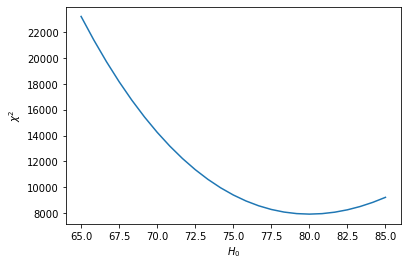

In [27]:
# Plot Chi-squared vs H_0

plt.plot(H0_range, -2. * log_likelihood(H0_range, q0_fix,j0_fix))
plt.ylabel(r'$\chi^2$')
plt.xlabel(r'$H_0$')

### Posterior probability 

In this section we will sample the posterior probability using the algorithm EMCEE to implement the Markov Chain Monte Carlo (MCMC) method. MCMC is a method for fitting models to data. 

According to Bayes Theorem, the posterior probability is given by

$$ 
P(\theta|d) = \frac{P(d|\theta)P(\theta)}{P(d)}, 
$$

where:
- $\theta$ is the cosmological parameters and  $d$ is the observed data, or samples. 
- $P(\theta|d)$ is the posterior probability for $\theta$, and it represents our degree of belief about the value of $\theta$ after we have seen the data $d$. 
- $P(d|\theta)=\mathcal{L}(\theta)$ is the likelihood function we already encountered. It is the probability of the data given a certain value of the parameters.
- $P(\theta)$ is the prior probability distribution. It represents our degree of belief in the value of $\theta$ before we see the data (hence the name).
- $P(d)$ is a normalizing constant, or the evidence, it ensures that the posterior is normalized to unity:$$ P(d)=\int d \theta P(d|\theta)P(\theta).$$


In our case, the posterior probability for $H_0$, $q_0$ and $j_0$ is given by
$$ 
P(H_0,q_0,j_0|SN) = \frac{P(H_0)P(q_0)P(j_0)\mathcal{L}((H_0,q_0,j_0))}{\mathcal{E}}, 
$$

where $\mathcal{E}$ is the evidence.

From now on, we use logarithm of probabilities to compute the log of posterior probability.

The log-prior probability is assumed to be zero if all the parameters are within their bounds and $-\infty$ if any of the parameters are outside their bounds.

In [28]:
# Compute the logarithm of the prior probability
# Input: H0 vector of parameters
# Output: the value of the prior at the specified parameter values

#def log_uniprior(H0,mu,sigma):
def log_uniprior(H0):
    if 65 < H0 < 85:
        return 0.0
    return -np.infty

In [31]:
# Check

l1 = log_uniprior(73)
l1

0.0

The posterior distribution combines the prior and the likelihood. It outputs negative infinity if the parameters lie outside the range of the prior.

In [63]:
# Compute log_posterior 
# Input: vector of parameters H0, parameters q_0 and j_0
# Output: the value of the posterior at the specified parameter values

def log_posterior(params,H0_range,q0,j0):
    H0, q0, j0 = params  # Unpack the parameters
    lu = log_uniprior(H0)
    if not np.isfinite(lu):
        return -np.inf
    return log_likelihood(H0,q0,j0) + lu

In [65]:
# Check the function

for H0_value in H0_range:
    params = [H0_value, q0_fix, j0_fix]
    result = log_posterior(params, H0_range, q0_fix, j0_fix)
    print(f'H0: {H0_value}, Log Posterior: {result}')

H0: 65.0, Log Posterior: -inf
H0: 65.83333333333333, Log Posterior: -10705.713383206576
H0: 66.66666666666667, Log Posterior: -9862.900098401591
H0: 67.5, Log Posterior: -9085.691352620532
H0: 68.33333333333333, Log Posterior: -8371.804784545626
H0: 69.16666666666667, Log Posterior: -7719.057234121017
H0: 70.0, Log Posterior: -7125.359411427917
H0: 70.83333333333333, Log Posterior: -6588.7109082674615
H0: 71.66666666666667, Log Posterior: -6107.195526816346
H0: 72.5, Log Posterior: -5678.976901903826
H0: 73.33333333333333, Log Posterior: -5302.294395434391
H0: 74.16666666666667, Log Posterior: -4975.459243269719
H0: 75.0, Log Posterior: -4696.850936505353
H0: 75.83333333333333, Log Posterior: -4464.913820550266
H0: 76.66666666666667, Log Posterior: -4278.153896755361
H0: 77.5, Log Posterior: -4135.135812553972
H0: 78.33333333333333, Log Posterior: -4034.480027185797
H0: 79.16666666666667, Log Posterior: -3974.860141085875
H0: 80.0, Log Posterior: -3955.0003779419676
H0: 80.833333333333

The purpose of a Markov chain Monte Carlo algorithm is to construct a sequence of points (or “samples”) in parameter space (called “a chain”). The crucial property of the chain is that the density of samples is proportional to the posterior pdf. This allows to construct a map of the posterior distribution.

To sample the posterior we use `emcee`, an open-source sampler for MCMC, and for analyzing the chains we use `getdist`. `emcee` requires a function that returns the log-posterior probability.

First, we define two key variables: `ndim` and `nwalkers`. The `nwalkers` variable is the number of "walkers" (different Markov Chains that run in parallel). 

In [67]:
ndim = 3
nwalkers = 10

In [68]:
# The length of the burn-in period:
burn_in_len = 400

In [72]:
# Initializing the walkers 
#p0 = np.random.randn(nwalkers, ndim)

central_values = [73,-0.55, 1.]
p0 = np.random.normal(central_values, scale=0.1, size=(nwalkers, ndim))
p0

array([[72.99525549, -0.54865962,  0.97990144],
       [73.04425088, -0.59655222,  1.02955438],
       [73.01515926, -0.59356011,  0.96551983],
       [73.04041385, -0.58443385,  0.96102484],
       [72.94514672, -0.49611053,  0.98810804],
       [73.11802458, -0.62507899,  1.14170083],
       [73.03427619, -0.50054353,  0.82091603],
       [72.90591529, -0.66131344,  1.21925898],
       [72.848205  , -0.62470993,  0.87178829],
       [73.01519537, -0.42667905,  0.94995482]])

In [73]:
# Creating an EnsembleSampler object and sampling with it

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(H0_range,q0_fix,j0_fix))

In [74]:
print ("Starting MCMC")
sampler.run_mcmc(p0, 10000)
print ("Finished MCMC")

Starting MCMC


<ipython-input-25-573c75abc384>:5: RuntimeWarning: invalid value encountered in log10
  return 5 * np.log10(lum_distance(z,H0,q0,j0)) + 25 + M_B


ValueError: Probability function returned NaN

## References

[1] David Camarena and Valerio Marra, _Local determination of the Hubble constant and the deceleration parameter_, Phys. Rev. Research 2, 013028 (2020).


[2] Oliver Piattella, _Lecture Notes in Cosmology_, Springer Cham (2018). 


[3] D. Foreman-Mackey, D. W. Hogg, D. Lang, and J. Goodman, _emcee: The MCMC Hammer_, Publ. Astron. Soc. Pac. 125 (2013) 306–312, https://arxiv.org/abs/1202.3665


[4] A. Lewis, _GetDist: a Python package for analysing Monte Carlo samples_, arXiv:1910.13970, https://getdist.readthedocs.io.